# **Introduction**

**Background: I am an Organisational Psychologist who is embarking on a journey to learn more about computer science, data science and machine learning.**

**Project Topic: Employee attrition can have significant financial and operational impacts on a company. Understanding the factors that contribute to employee attrition is essential for HR professionals and business leaders. In this analysis, we utilise various supervised machine learning algorithms like logistic regression, random forest and gradient boosting models to predict employee attrition. The dataset used in this analysis contains various features related to employee data and attrition as an outcome criterion. Through predictive models trained on the attrition dataset, I hope to understand the different approaches to machine learning better and to see how they can be translated in HR-related problems like employee attrition.**

**This is a fictional dataset created by IBM data scientists to study attrition found in the link below: 
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data**

**IBM. IBM HR Analytics Employee Attrition & Performance (Uploaded by Pavan Subhash) . Kaggle. Retrieved [18 Oct 2023] from [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data].**

# **Load Packages**

In [2]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

# Initial Look

**The fictional data is found in a .csv file (227.98 kB) on Kaggle (info in Intro).
There are 1470 rows of employee data with 35 columns/features (including Attrition). 
There are 26 numerical features and 9 categorical features (including Attrition).**

# Data Cleaning

In [7]:
# Check for missing data
missing_values = data.isnull().sum()

# Check for constant data
no_unique_values = data.nunique()

missing_values, no_unique_values

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

**While there is no missing values found, 3 columns ('EmployeeCount', 'Over18', 'StandardHours') were found to have constant values for all 1470 rows. Also, 'EmployeeNumber' is a unique identifier for all 1470 rows. These 4 columns should be dropped as they would not be helpful in predicting attrition.  the categorical variables so they can be properly utilized in our models. We will also check for any class imbalance in our target variable, 'Attrition', as this will inform our approach to modeling later on.**

In [8]:
# Drop the 4 columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
data = data.drop(columns=columns_to_drop)

In [9]:
# Check for imbalance
attrition_counts = data['Attrition'].value_counts()
attrition_counts

Attrition
No     1233
Yes     237
Name: count, dtype: int64

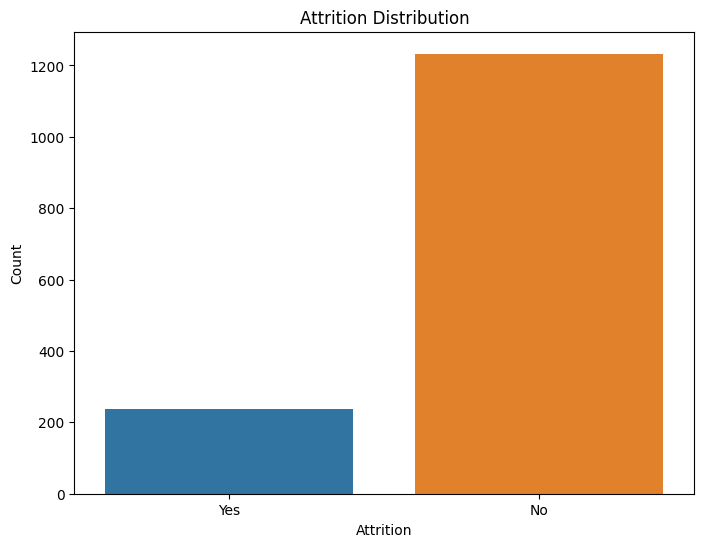

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

**As expected, the 'Attrition' column shows a significant class imbalance with 1233 'No' and 237 'Yes'. This imbalance should be addressed prior to model training to prevent overemphasis towards 'No' class when our study focus is on the employees who attrite - 'Yes'.**

# Exploratory Data Analysis

**We will start by examining factors that are well-researched and linked to attrition - Age, Income, Job Role, Years at Company, Job Satisfaction and Work-Life Balance - and see their distribution across the two classes of Attrition. Below are some papers that are relevant if reviewers are interested.**


Azeem, S. M., & Akhtar, N. (2014). The influence of work life balance and job satisfaction on organizational commitment of healthcare employees. International journal of human resource studies, 4(2), 18.

Ng, T. W., & Feldman, D. C. (2010). The relationships of age with job attitudes: A meta‐analysis. Personnel psychology, 63(3), 677-718.

Steel, R. P., & Ovalle, N. K. (1984). A review and meta-analysis of research on the relationship between behavioral intentions and employee turnover. Journal of applied psychology, 69(4), 673.

Wright, B. E., & Christensen, R. K. (2010). Public service motivation: A test of the job attraction–selection–attrition model. International Public Management Journal, 13(2), 155-176.

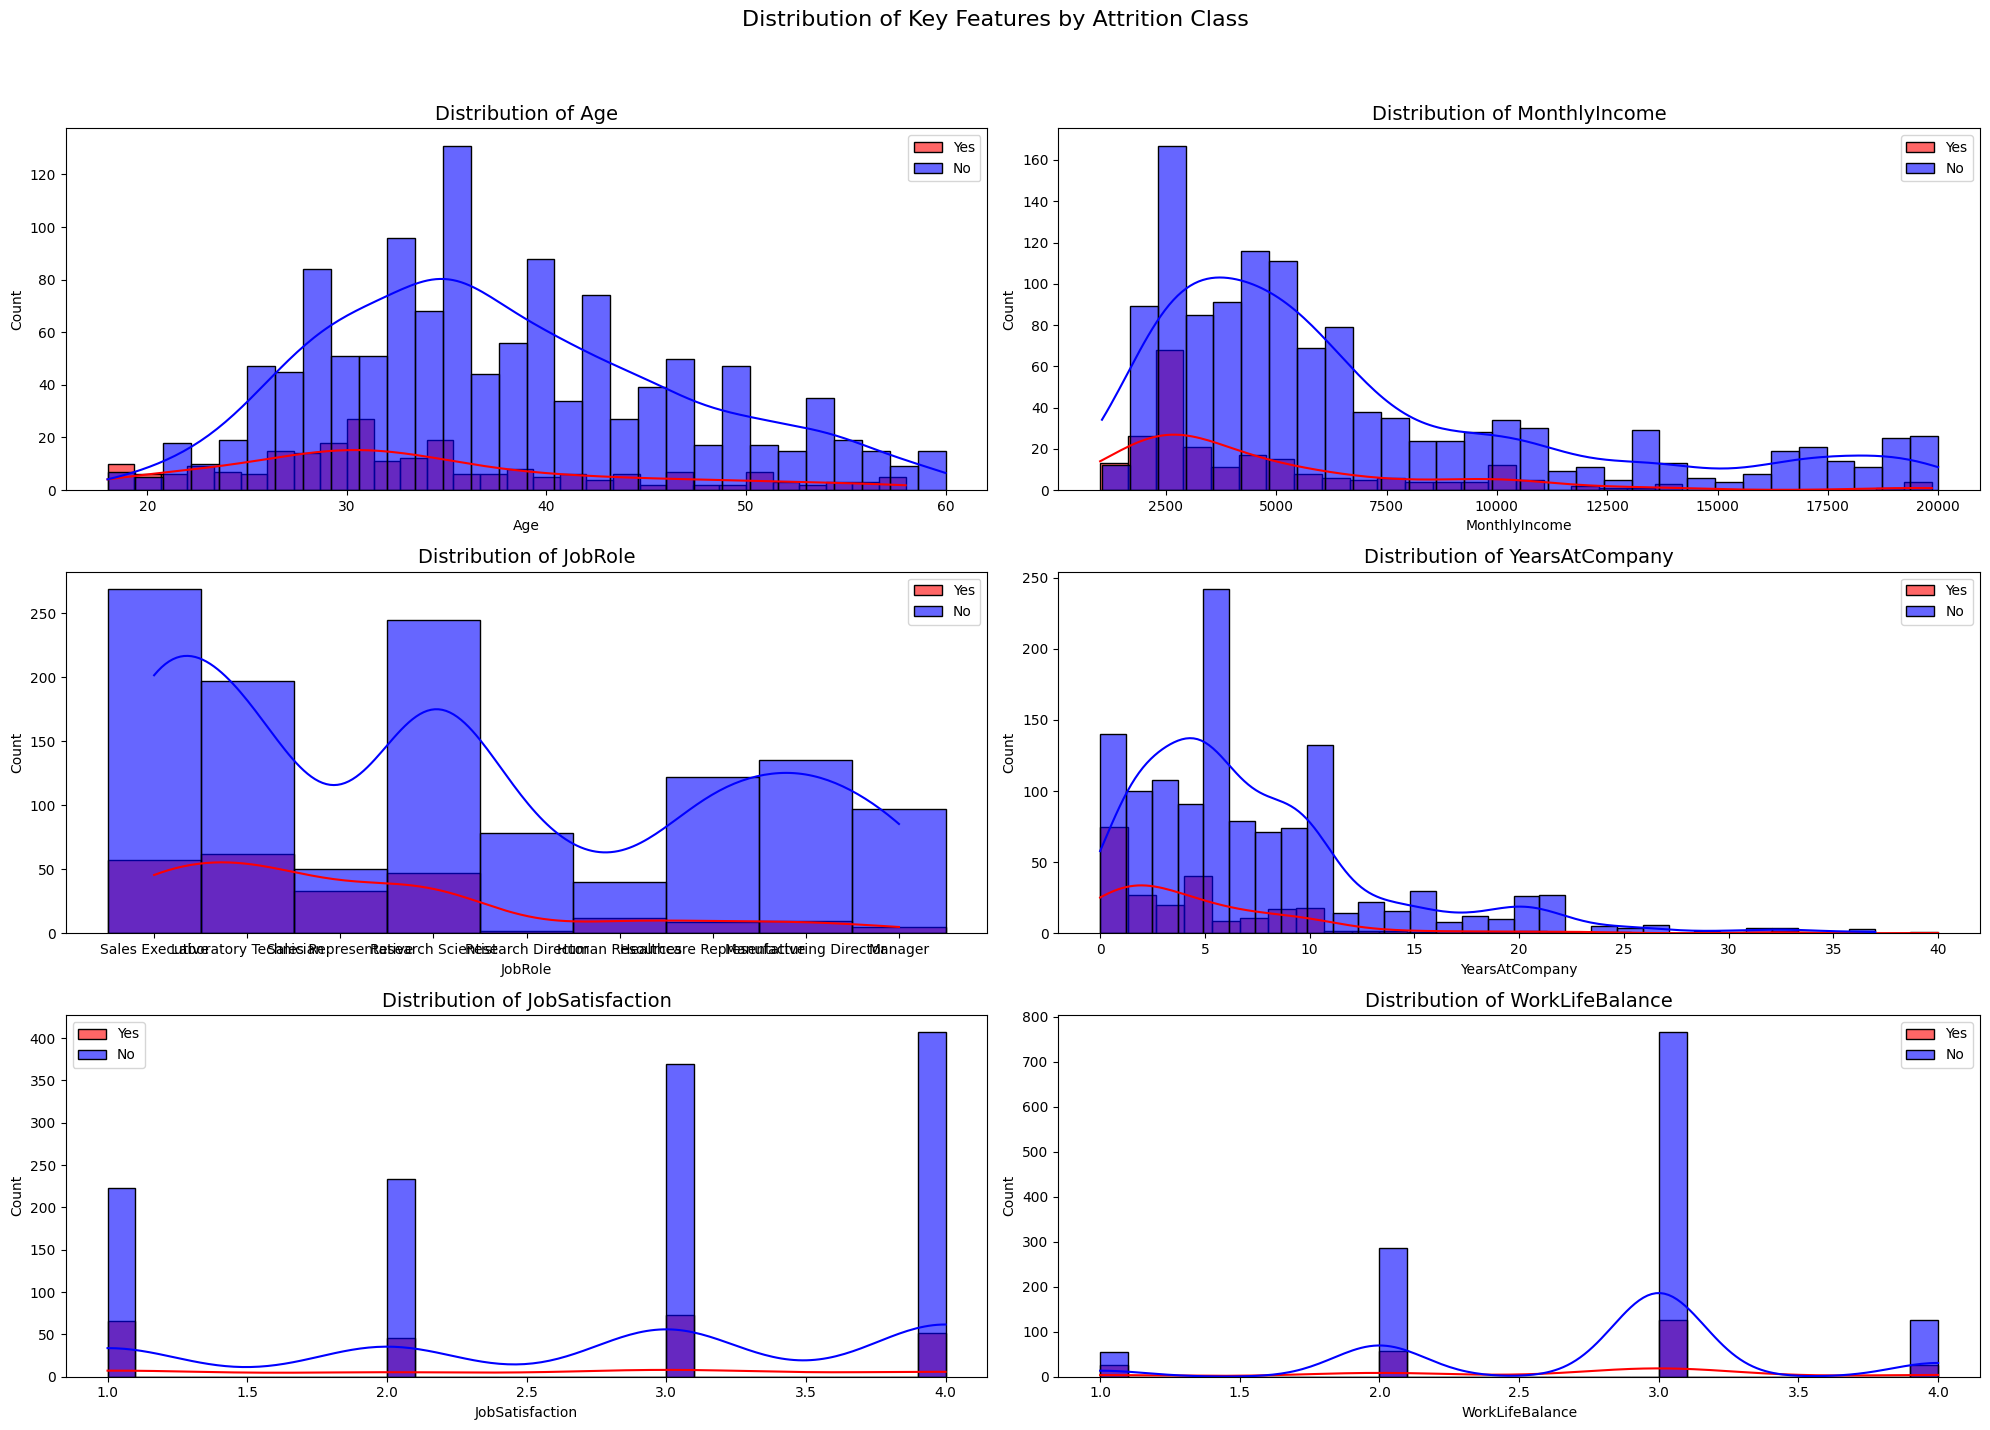

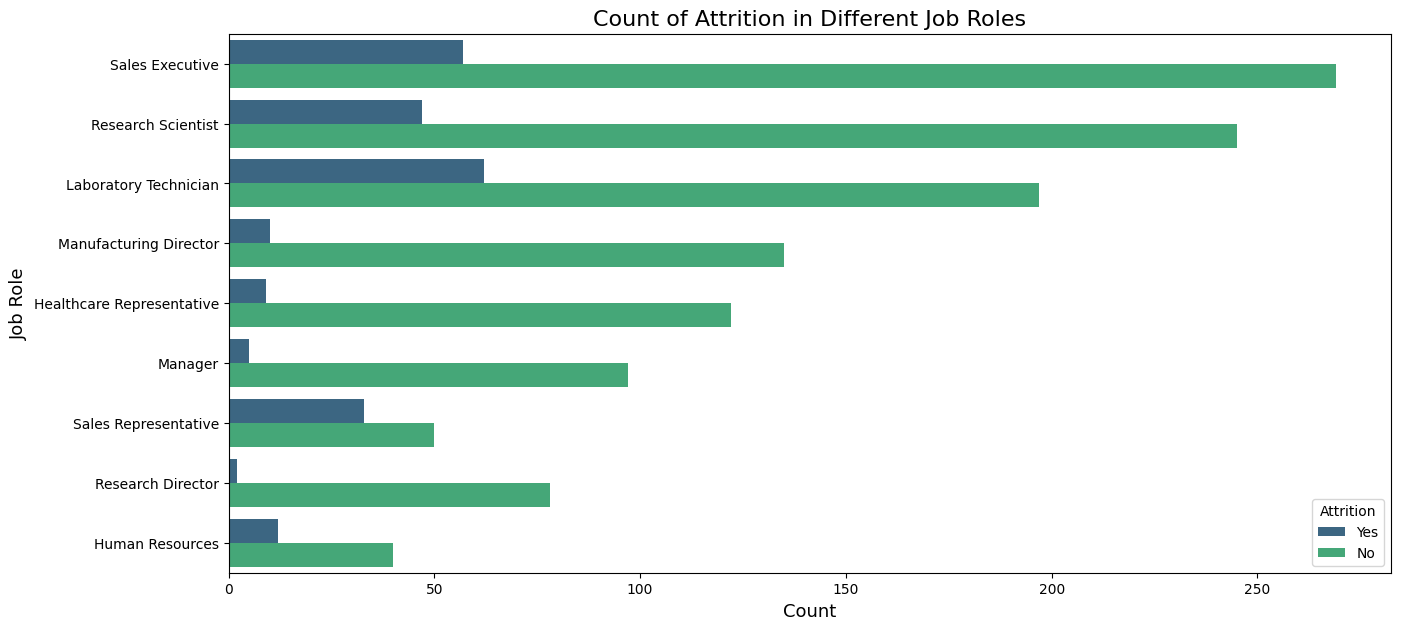

In [11]:
# Create key features
key_features = ['Age', 'MonthlyIncome', 'JobRole', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']

attrition_yes = data[data['Attrition'] == 'Yes']
attrition_no = data[data['Attrition'] == 'No']

# Examine distribution
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Distribution of Key Features by Attrition Class', fontsize=16)

for ax, feature in zip(axes.ravel(), key_features):
    sns.histplot(attrition_yes[feature], bins=30, label='Yes', kde=True, color='red', ax=ax, alpha=0.6)
    sns.histplot(attrition_no[feature], bins=30, label='No', kde=True, color='blue', ax=ax, alpha=0.6)
    
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Had to adjust for categorical data (countplot) to make better sense
# Side note: Psychologists treat likert scale data like JobSat as interval data

plt.figure(figsize=(15, 7))
sns.countplot(data=data, y='JobRole', hue='Attrition', palette='viridis')
plt.title('Count of Attrition in Different Job Roles', fontsize=16)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Job Role', fontsize=13)
plt.show()

**Initial look at the distribution does suggest that the data is inclined towards research-backed evidences. There is a noticeable difference between employees who left and those who stayed for features like Age, Monthly Income and Years at Company.**

**However, the imbalanced class distribution does make it hard to visualise the difference for JobSat and WLB. Although these are the factors that have the most findings on negative engagement, abesenteeism and attrition in organisational studies.**

**On the other hand, some job roles experience more attrition (ratio wise) than other positions - notably with Sales Executive, Research Scientist, Laboratory Technician, Sales Representative - and less in more management roles - notably Director and Manager level job roles. The Job Level feature might have been a better representation visually but I think the Job Role will be able to help us make sense of the data qualitatively better.**

**Next, we will encode the categorical variables and construct a correlation matrix to understand the relationships of the factors better and identify any multicollinearity issues.**

In [12]:
# Features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X = X.astype(int)

#Encode Attrition
y = LabelEncoder().fit_transform(y)

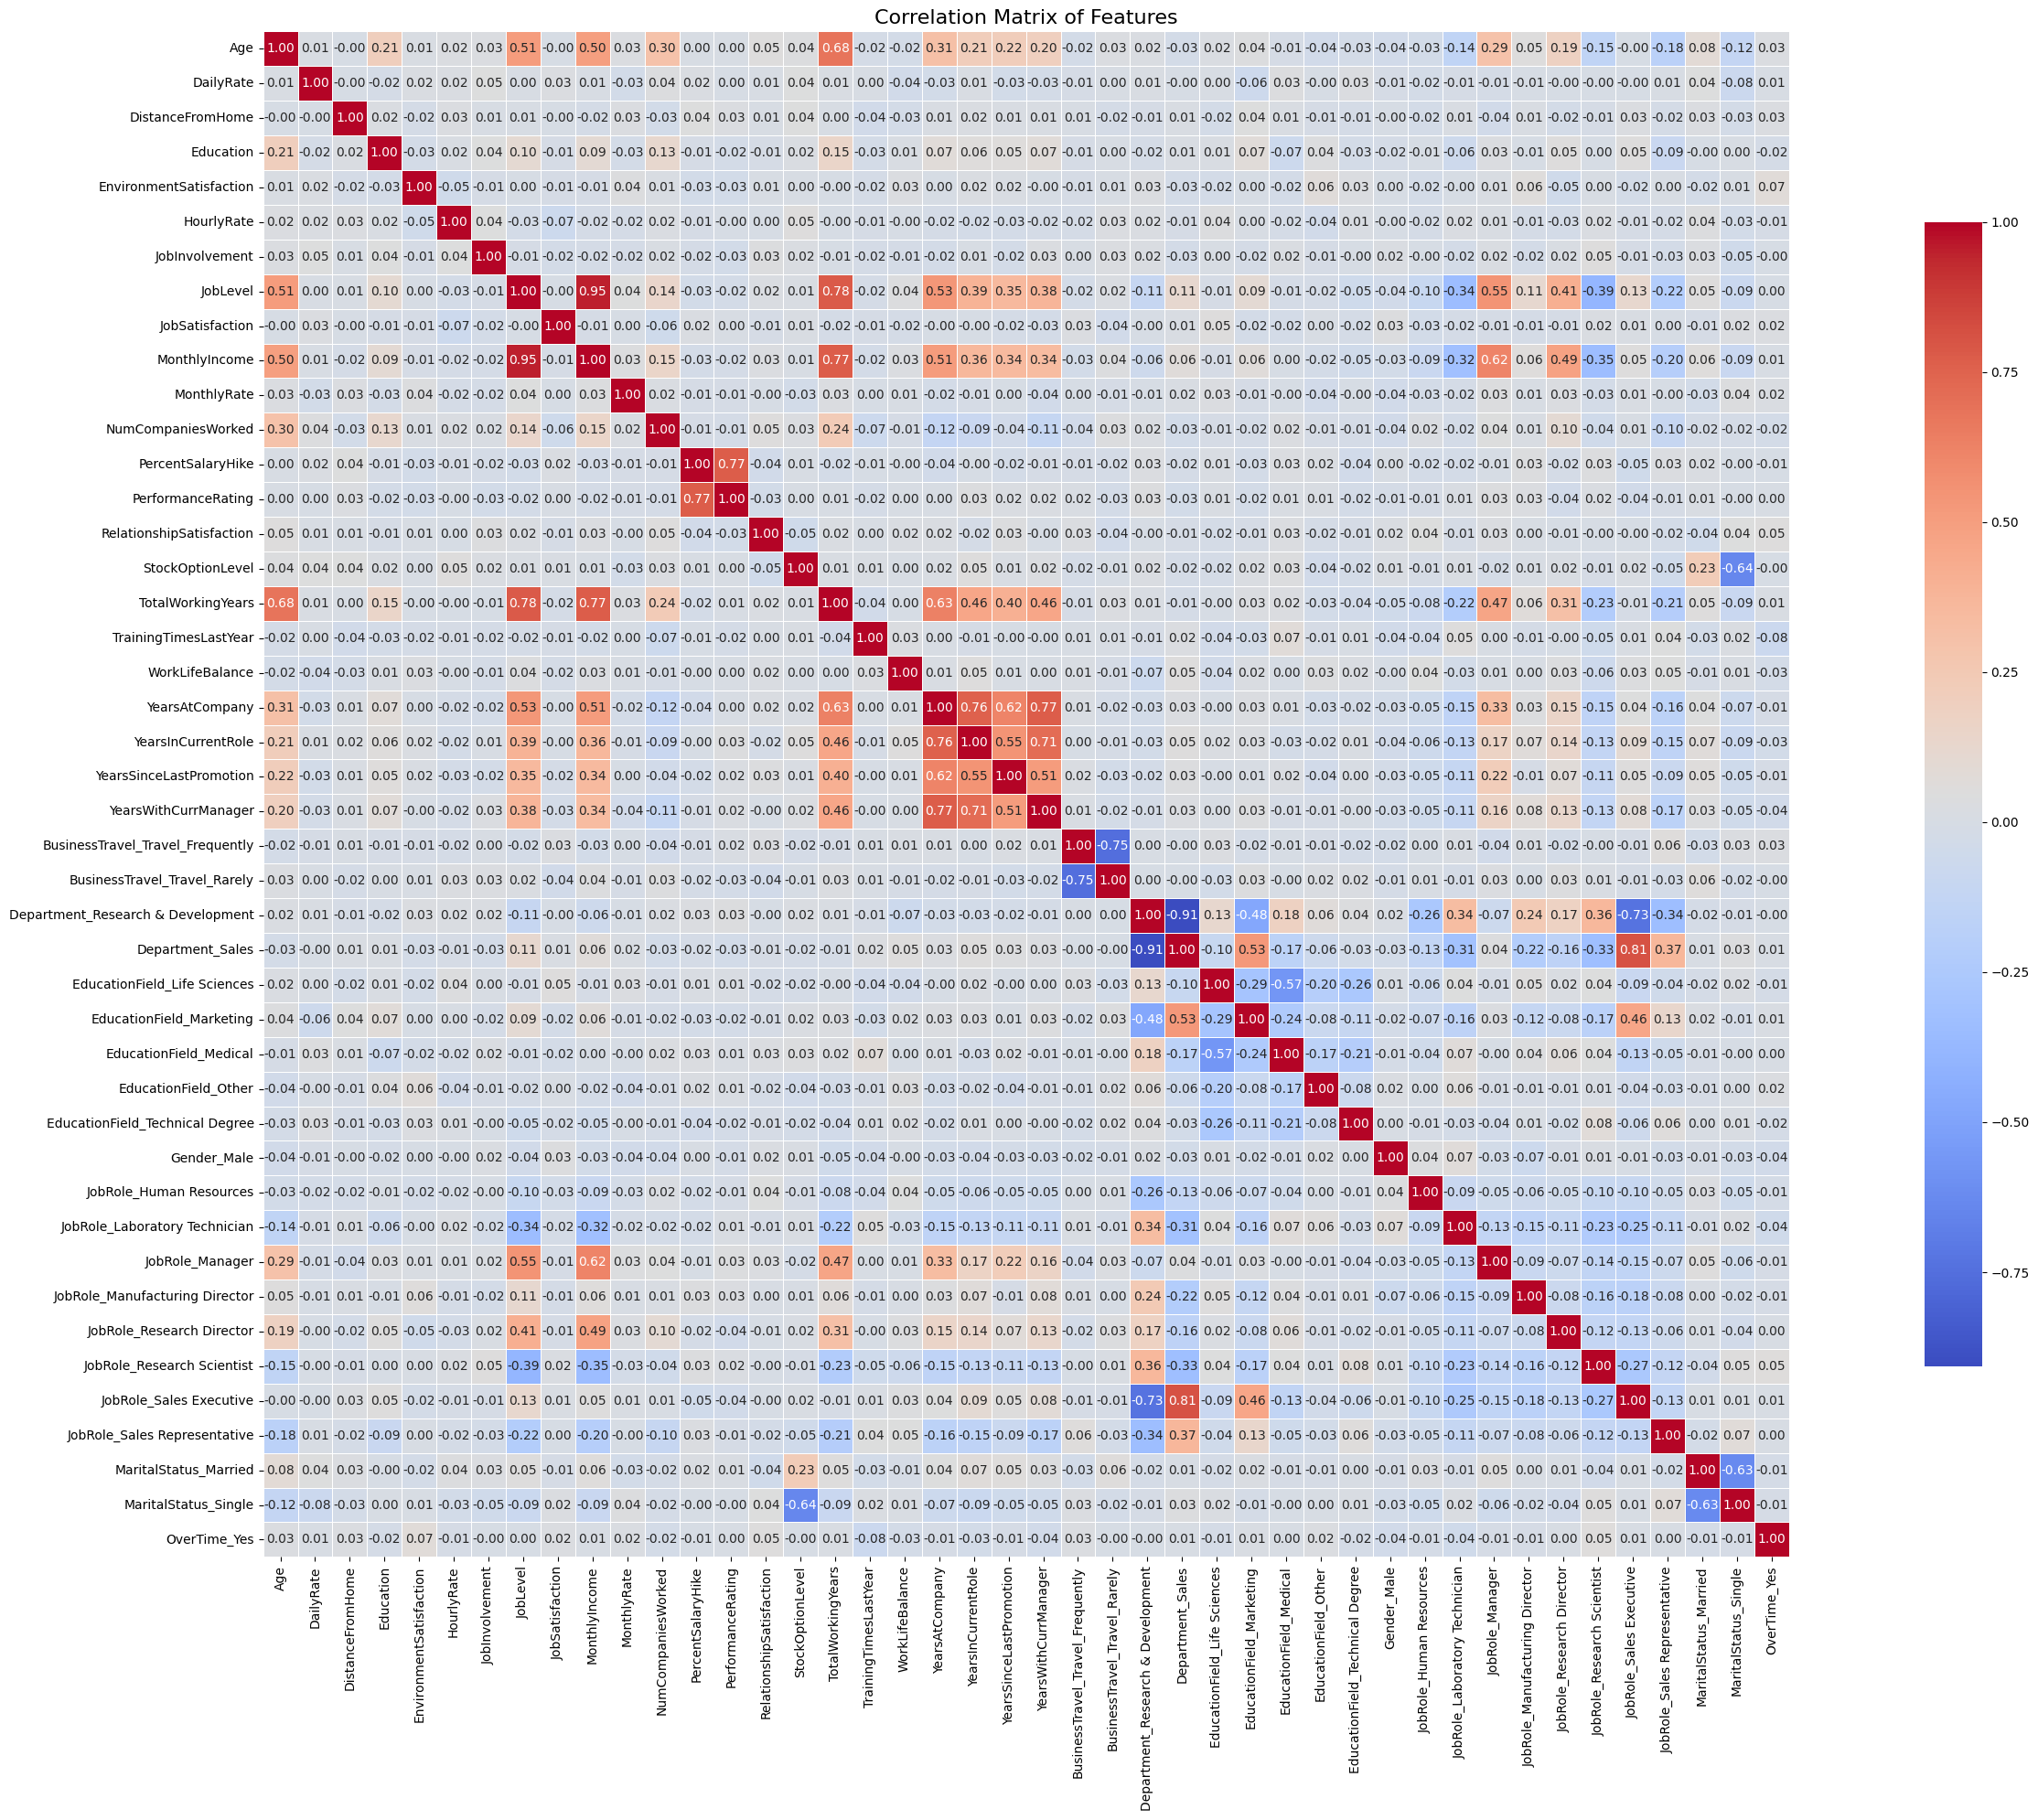

In [13]:
# Correlation Matrix
correlation_matrix = X.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, 
            cbar_kws={"shrink": .75}, linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

**Between the predictors, 'MonthlyIncome' is highly correlated with 'JobLevel' (0.95), suggesting that these variables might be conveying overlapping information. 'TotalWorkingYears' has strong positive correlations with 'JobLevel' (0.78) and 'MonthlyIncome' (0.77), which is expected as more experienced employees are likely at a higher job level and earn more. 'YearsWithCurrManager', 'YearsAtCompany', and 'YearsInCurrentRole' are also positively correlated, indicating that employees tend to stay in their roles and with the same managers.**

**For this analysis,I will remove MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager using a cutoff of 0.7 correlation coefficient. This will retain JobLevel and YearsAtCompany and remove possibility of multicollinearity from the features.**

**For MonthlyIncome, the high correlation with job level and sensitivity around salary makes it both redundant and hard to work with in policy change management. For TotalWorkingYears, the data will be encapsulated in other features like YearsAtCompany. For YearsInCurrentRole and YearsWithCurrManager, the data will not pose much additional insights beyond YearsAtCompany, considering organisational structures/functional specialisations (e.g. Accounting) are what keep individuals in similar Department and role.**

In [14]:
X = X.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'])


# Model Building

In [15]:
# Recap of changes to feature data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

**Logistic Regression**

**We will first try to build a logistic regression model, which is specifically designed for binary classification problems and the most straightforward model in our case. Prior to model building, we will split the data into training and test dataset and balance the data using SMOTE (Synthetic Minority Over-sampling Technique) due to the highly imbalanced class distribution in Attrition.**

**In balancing, there are a couple of techniques commonly employed - weighting, down-sampling, up-sampling and SMOTE.
Here, we will utilise SMOTE to combine both down-sampling of the majority class (Attrition - 'No') and up-sampling of the minority class (Attrition - 'Yes').**

In [16]:
# Split the data into training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Accuracy: 0.8843537414965986
Confusion Matrix:
 [[242  13]
 [ 21  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



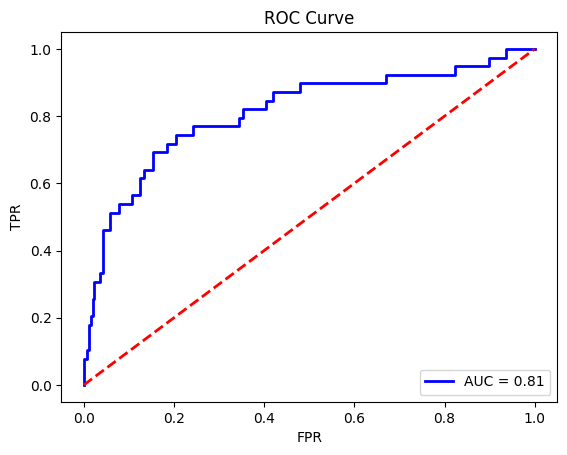

AUC-ROC Score: 0.8115635997988939


In [17]:
# Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

ypp = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, th = roc_curve(y_test, ypp) 
auc = roc_auc_score(y_test, ypp)

lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC-ROC Score:", auc)

**Using the balanced sample via SMOTE, the logistic regression model produced an F1 score of 0.51 and an AUC of 0.81. Considering the small number of employees who left the company, this suggest that the linear model was surprisingly effective in predicting attrition. When dealing with imbalanced datasets, it is perhaps useful to point out that the F1 score can be a better metric than AUC. This is because F1 score balances precision and recall and is less affected by class imbalance. It is also important to look across the results and examine relevance to the study. In our case, the accuracy score is less useful as there is lesser emphasis on the minority class (Attrition - 'Yes') with the better results in the majority class.**

**To improve the results, we will seek to perform hyperparameter tuning for the logistic regression model via GridSearchCV (with Cross Validation = 5) on the SMOTE balanced dataset.**


Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2'}
Accuracy (Tuned Logistic Regression): 0.8877551020408163
Confusion Matrix (Tuned Logistic Regression):
 [[243  12]
 [ 21  18]]
Classification Report (Tuned Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       255
           1       0.60      0.46      0.52        39

    accuracy                           0.89       294
   macro avg       0.76      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294



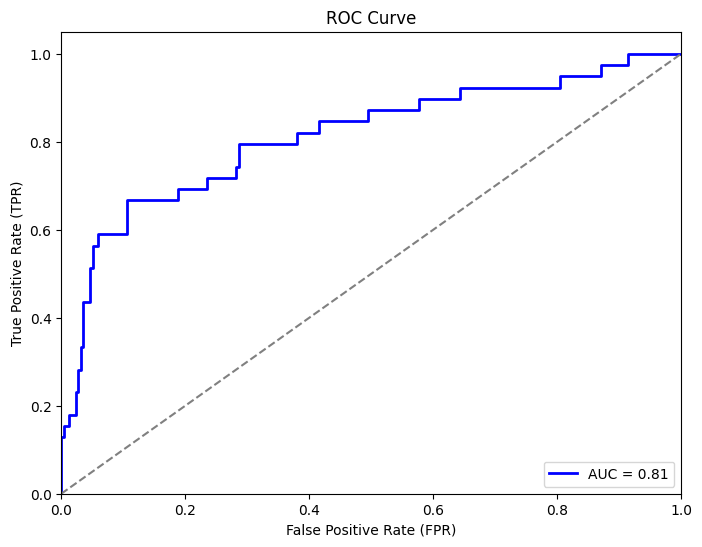

AUC-ROC Score: 0.8123680241327301


In [18]:
# Hyperparameter Tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],   
}

# GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)

best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_lr = best_estimator_lr.predict(X_test)
accuracy_tuned_lr = accuracy_score(y_test, y_pred_tuned_lr)
conf_matrix_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)
class_report_tuned_lr = classification_report(y_test, y_pred_tuned_lr)

print("\nBest Parameters (Logistic Regression):", best_params_lr)
print("Accuracy (Tuned Logistic Regression):", accuracy_tuned_lr)
print("Confusion Matrix (Tuned Logistic Regression):\n", conf_matrix_tuned_lr)
print("Classification Report (Tuned Logistic Regression):\n", class_report_tuned_lr)

# AUC-ROC
y_prob_lr = best_estimator_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score:", roc_auc_lr)

**With the hyperparameter tuning, it seems that there is only a slight improvement in the F1 score from 0.51 to 0.52 for Attrition['Yes] and AUC from 0.811 to 0.812. Nonetheless, with the relatively small sample and lack of longitudinal employee data, such scores are decent in aiding the company to predict Attrition and work on tailored interventions.**

**We will seek to examine the data through a different model - Random Forest. Considering the numerous correlations across the features, the low F1 score in the logistic regression may be attributed to more non-linear and complex relationships across features and Attrition. There may also be more noisy data in this case as our hyperparameter tuning did not pose much benefit to the linear regression. This prompt us to utilise the Random Forest model to see if we can deal better with the possible presence of complex relationships and noisy data.**

**We will jump straight into hyperparameter tuning via GridSearchCV (with Cross Validation = 5) on the SMOTE balanced dataset for Random Forest model building.**


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Tuned Random Forest): 0.8809523809523809
Confusion Matrix (Tuned Random Forest):
 [[249   6]
 [ 29  10]]
Classification Report (Tuned Random Forest):
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



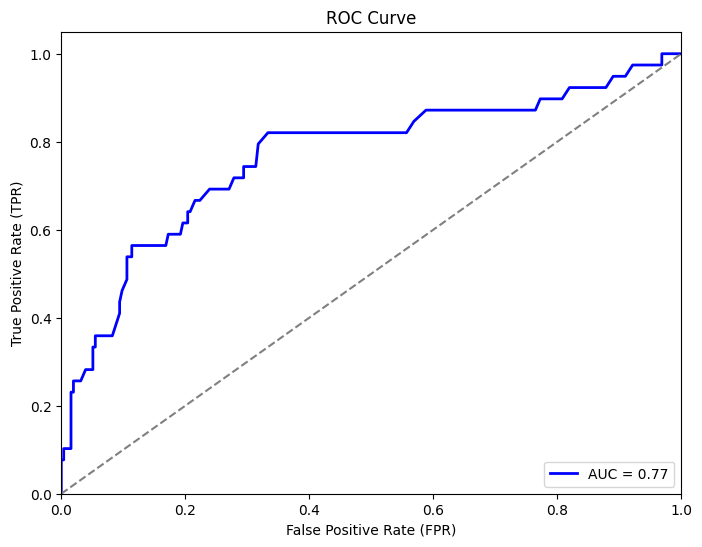

AUC-ROC Score (Random Forest): 0.7662141779788839


In [19]:
# Random Forest
# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
class_report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print("\nBest Parameters (Random Forest):", best_params_rf)
print("Accuracy (Tuned Random Forest):", accuracy_tuned_rf)
print("Confusion Matrix (Tuned Random Forest):\n", conf_matrix_tuned_rf)
print("Classification Report (Tuned Random Forest):\n", class_report_tuned_rf)

# AUC-ROC
y_prob_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Random Forest):", roc_auc_rf)


**Interestingly, the hyperparameter tuned Random Forest model did not perform as well as the logistic regression with a F1 score of 0.36 for Attrition['Yes] and an AUC score of 0.77.**

**While we hypothesized more complex and non-linear relationships across features and Attrition, the relatively poor performance of Random Forest in this context suggests that the underlying data may not exhibit strong non-linear dependencies.**

**Next, we will seek to improve the prediction modelling through Gradient Boosting method. As GB builds trees sequentially by weighing misclassified samples more heavily, it is possible that the model will provide higher predictive stats for Attrition.**

**Again, we will jump straight into hyperparameter tuning via GridSearchCV (with Cross Validation = 5) on the SMOTE balanced dataset for Gradient Boosting model building.**


Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Accuracy (Tuned Gradient Boosting): 0.8707482993197279
Confusion Matrix (Tuned Gradient Boosting):
 [[242  13]
 [ 25  14]]
Classification Report (Tuned Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294



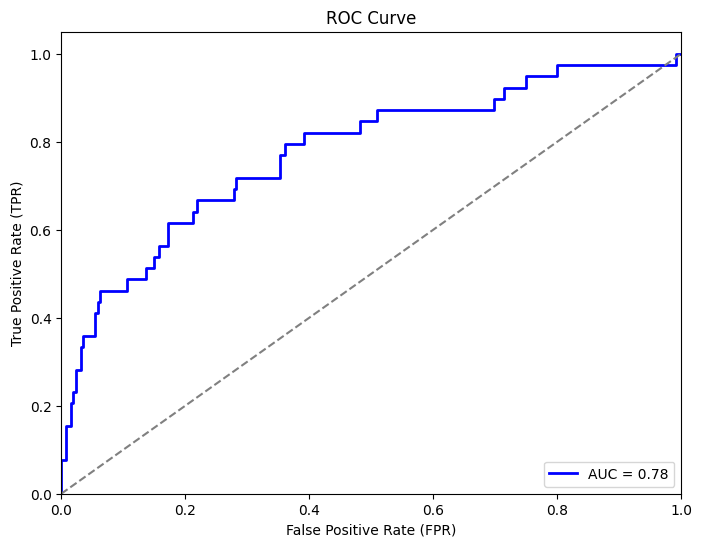

AUC-ROC Score (Gradient Boosting): 0.7758672699849171


In [20]:
# Gradient Boosting
# Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_grid=param_grid_gb,
                cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_resampled, y_train_resampled)
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_gb = best_estimator_gb.predict(X_test)
accuracy_tuned_gb = accuracy_score(y_test, y_pred_tuned_gb)
conf_matrix_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
class_report_tuned_gb = classification_report(y_test, y_pred_tuned_gb)

print("\nBest Parameters (Gradient Boosting):", best_params_gb)
print("Accuracy (Tuned Gradient Boosting):", accuracy_tuned_gb)
print("Confusion Matrix (Tuned Gradient Boosting):\n", conf_matrix_tuned_gb)
print("Classification Report (Tuned Gradient Boosting):\n", class_report_tuned_gb)

# AUC-ROC
y_prob_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC Score (Gradient Boosting):", roc_auc_gb)


**Again, the hyperparameter tuned Gradient Boosting model did not perform as well as the logistic regression with a F1 score of 0.42 for Attrition['Yes] and an AUC score of 0.78. It did, however, do better than the Random Forest model, likely due to the sequential learning algorithm. Ensemble methods tend to excel with non-linear relationships and interactions between features. The relatively poor performance of Random Forest and Gradient Boosting in this context suggests that the underlying data may indeed not be exhibiting strong non-linear dependencies.**

**With the analysis of this binary classification problem through 3 different models and hyperparameter-tuning, we will look at the results collectively in the next section.**

# Results & Analysis

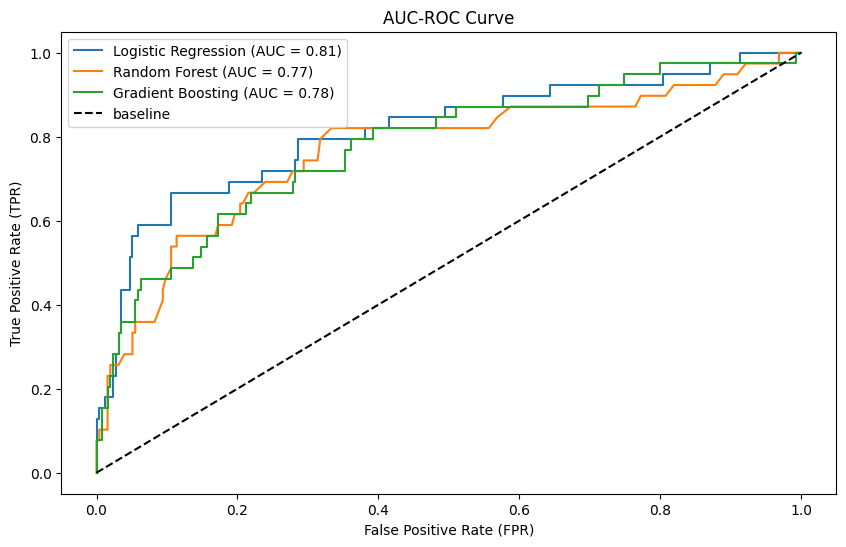


Model Evaluation Metrics:
                 Model       AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.812368   0.600000  0.461538  0.521739
1        Random Forest  0.766214   0.625000  0.256410  0.363636
2    Gradient Boosting  0.775867   0.518519  0.358974  0.424242


In [21]:
models = [best_estimator_lr, best_estimator_rf, best_estimator_gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# ROC
for model, name in zip(models, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Consolidated Results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("\nModel Evaluation Metrics:")
print(metrics_df)


**Looking at the data collectively, we can tell again that the logistic regression model emerged as the top performer, achieving an F1 score of approximately 0.52 for Attrition['Yes'] and an AUC of 0.81. This outcome suggests that there is likely the existence of linear relationships between Attrition and the features and Attrition is less likely to depend on non-linear or more complex relationships with other features. Also, when dealing with imbalanced datasets, it is important to point out again that the F1 score can be a better metric than AUC. This is because F1 score balances precision and recall and is less affected by class imbalance. While accuracy score is more commonly used, it is less useful in this context as there is lesser emphasis on the minority class (Attrition - 'Yes') due to the overemphasis of better results in the majority class. Overall, considering the relatively small sample of Attrition['Yes'] data and lack of longitudinal employee data, the results from the logistic regression model is satisfactory and decent in aiding the company to predict Attrition and work on tailored interventions.**

**On the other hand, Random Forest and Gradient Boosting algorithms may not have shined here because of the relatively small/moderate sized dataset. For these 2 ensemble methods, it is likely that we will see better predictive statistics when there is a larger dataset in order to fully exploit their capabilities. In our context, their complexity in building the model might have led to overfitting issues with limited data size.**

                             Feature  Coefficient
39                      OverTime_Yes     1.509276
12                 PerformanceRating     0.417478
19  BusinessTravel_Travel_Frequently     0.194502
10                NumCompaniesWorked     0.140618
18           YearsSinceLastPromotion     0.090782
28                       Gender_Male     0.071276
38              MaritalStatus_Single     0.048594
2                   DistanceFromHome     0.034816
5                         HourlyRate     0.003547
9                        MonthlyRate     0.000018


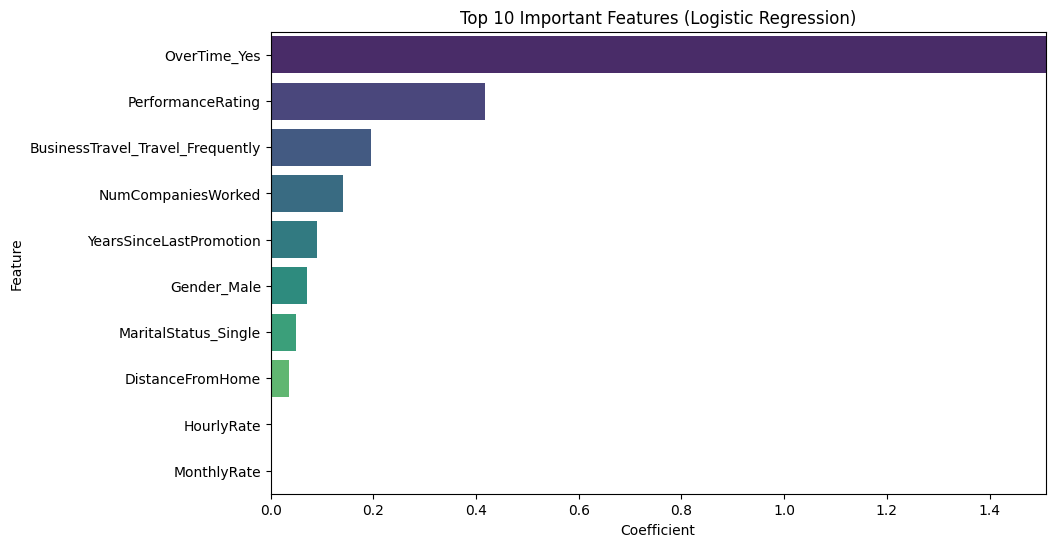

In [22]:
# Examining top 10 Features
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

print(top_10_features_lr)
import matplotlib.pyplot as plt
import seaborn as sns

coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr, palette='viridis')
plt.xlim(0, top_10_features_lr['Coefficient'].max())  # Set the x-axis limit from 0 to the maximum coefficient
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

# Discussion and Conclusion

**As the logistic regression model emerged as the winner in our dataset context, we plotted the top 10 features from the model for the prediction on attrition. Below, we listed some explanation for each of the feature's possible causality in attributing attrition. We will also leave out HourlyRate and MonthlyRate due to their relatively small coefficient which reflects little to no influence vis-a-vis other features on Attrition in real-world settings.**

**OverTime_Yes (1.509276): Overtime work may lead to burnout and decreased job satisfaction, which can contribute to attrition.**

**PerformanceRating (0.417478): Surprisingly, better performance rating is associated with a higher likelihood of attrition. This, however, suggest that top employees may have attrited in light of better prospects for their careers elsewhere.**

**BusinessTravel_Travel_Frequently (0.194502): Frequent travel may disrupt work-life balance, possibly contributing to attrition.**

**NumCompaniesWorked (Coefficient: 0.140618): Employees who have worked in more companies may be more willing to seek outside opportunities in line with their working history.**

**YearsSinceLastPromotion (0.090782): Lack of career advancement may lead to employee dissatisfaction and contribute to attrition.**

**Gender_Male (0.071276): Male employees are slightly more likely to attrite than female employees. This has no working research explanation and would warrant further investigation in the company. However, taking a look across employee data might suggest that males may have a higher tendency to score higher on the other relevant features in affecting attrition.**

**MaritalStatus_Single (0.048594): The lack of family commitment or other financial ties might have influence single employees to look for other career opportunies elsewhere.**

**DistanceFromHome (Coefficient: 0.034816): Commuting stress or a desire for proximity to home may play a role in influencing attrition.**

**In this analysis, the results suggest that addressing work-life balance issues related to overtime and frequent business travel may help reduce attrition rates. Additionally, HR departments should pay attention to employees who have not received promotions for an extended period, as this group exhibits a higher likelihood of attrition. Higher performing employees are also likely to be talent-scouted by competition. A focus on recognition of work and tangible rewards should be emphasized in performance ranking systems, while employee engagement initiatives and personalised retention strategies may be useful through predicting potential employees who are thinking of leaving. Care has to be taken, however, in how HR policies are implemented to avoid the case of over-classification or targeting of employees on a basis on higher likelihood to leave the company from past data.**

**For the model building, it is interesting that the more simple logistic regression emerged as a winner as compared with more powerful and complex models. This also bring about the importance of starting with simple models and the linkage to Occam's razor principle. In this exercise, I had learnt more about the different modeling approaches and also see how the translation of model building intertwine with the necessity to understand the real-world business question through employee data and attrition. Looking at the study approach, it is possible that the selected features, while important individually, may not capture the full complexity of attrition patterns in the organization. Attrition often results from a combination of factors, including personal preferences, job satisfaction, and career advancement opportunities, which may not be fully represented in the available data. Patterns on attrition should also be viewed longitudinally, as the multi-year experiences of employees will have a larger influence on their decision to leave the company.**